## Code

In [1]:
from transformers import pipeline 
import pandas as pd 
import os 
from collections import Counter
import matplotlib.pyplot as plt

/home/coder/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-17 17:50:34.103774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = os.path.join("data", "fake_or_real_news.csv") # Defining path to the data
data = pd.read_csv(data) # Reading in as a dataframe using pandas
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [25]:
headlines = data["title"] # Only selecting column "title" and storing in headlines
headlines 

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [4]:
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False) # Only return the emotion with the highest score 

/home/coder/.local/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
emotion_list = [] # Creating an empty list to store the headlines emotions.

In [ ]:
for headline in headlines: # For loop that goes through each headline in the list headlines, and uses the classifier.
    emotion_list.append(classifier(headline)[0]["label"])  # append list #output[0]["label"]
    # using classifier to get emotion of each headline. The emotions are stored as dictionaries in a list. [0] gets the first dirctonary in the list ["label"] is they.
    # by only selecting label, I append it to the empty list emotion_list.
print(emotion_list)

In [10]:
emotion_list

['fear',
 'sadness',
 'joy',
 'anger',
 'neutral',
 'neutral',
 'fear',
 'sadness',
 'neutral',
 'neutral',
 'fear',
 'disgust',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'disgust',
 'fear',
 'neutral',
 'neutral',
 'fear',
 'joy',
 'neutral',
 'fear',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'disgust',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'disgust',
 'fear',
 'anger',
 'neutral',
 'sadness',
 'surprise',
 'anger',
 'fear',
 'fear',
 'neutral',
 'anger',
 'surprise',
 'fear',
 'neutral',
 'anger',
 'disgust',
 'neutral',
 'neutral',
 'fear',
 'neutral',
 'neutral',
 'anger',
 'fear',
 'fear',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'anger',
 'neutral',
 'surprise',
 'fear',
 'neutral',
 'neutral',
 'neutral',
 'fear',
 'sadness',
 'sadness',
 'neutral',
 'fear',
 'anger',
 'neutral',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'neutral',
 'disgust',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neut

In [18]:
emotion_count = Counter(emotion_list) # Using counter from collections to get each occurance of the emotion

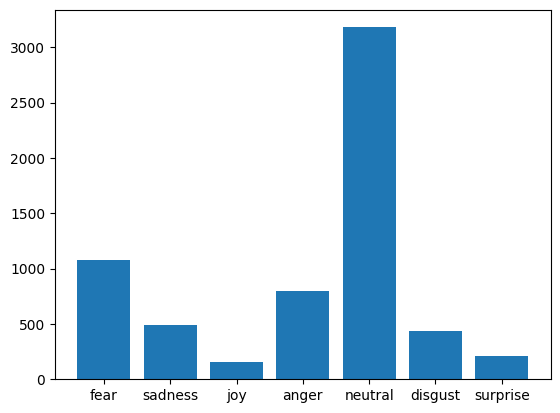

In [21]:
emotion = list(emotion_count.keys()) # Converting the keys to a list 
count = list(emotion_count.values()) # Converting the values to a list 

plt.bar(range(len(emotion_count)), count, tick_label=emotion)
plt.show()

# Real

In [27]:
 data_filtered_real = data[data['label'] == 'REAL']


In [28]:
real = data_filtered_real["title"]
real

2             Kerry to go to Paris in gesture of sympathy
4        The Battle of New York: Why This Primary Matters
7                       ‘Britain’s Schindler’ Dies at 106
8       Fact check: Trump and Clinton at the 'commande...
9       Iran reportedly makes new push for uranium con...
                              ...                        
6324    Alabama Lawmaker: Same-Sex Couples Don’t Deser...
6327    GOP Senator David Perdue Jokes About Praying f...
6330    State Department says it can't find emails fro...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 3171, dtype: object

In [34]:
real_emotions = []

In [ ]:
v  # append list #output[0]["label"]
    # using classifier to get emotion of each headline. The emotions are stored as dictionaries in a list. [0] gets the first dirctonary in the list ["label"] is they.
    # by only selecting label, I append it to the empty list emotion_list.
print(real_emotions)

In [40]:
real_emotion_count = Counter(real_emotions) # Using counter from collections to get each occurance of the emotion

# Fake

In [29]:
 data_filtered_fake = data[data['label'] == 'FAKE']

In [31]:
fake = data_filtered_fake["title"]
fake

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
3       Bernie supporters on Twitter erupt in anger ag...
5                                             Tehran, USA
6       Girl Horrified At What She Watches Boyfriend D...
                              ...                        
6326    DOJ COMPLAINT: Comey Under Fire Over Partisan ...
6328    Radio Derb Is On The Air–Leonardo And Brazil’s...
6329    Assange claims ‘crazed’ Clinton campaign tried...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
Name: title, Length: 3164, dtype: object

In [36]:
fake_emotions = []

In [ ]:
for line in fake: # For loop that goes through each headline in the list headlines, and uses the classifier.
    fake_emotions.append(classifier(line)[0]["label"])  # append list #output[0]["label"]
    # using classifier to get emotion of each headline. The emotions are stored as dictionaries in a list. [0] gets the first dirctonary in the list ["label"] is they.
    # by only selecting label, I append it to the empty list emotion_list.
print(fake_emotions)

In [41]:
fake_emotion_count = Counter(fake_emotions) # Using counter from collections to get each occurance of the emotion

# Visualize all three in one 

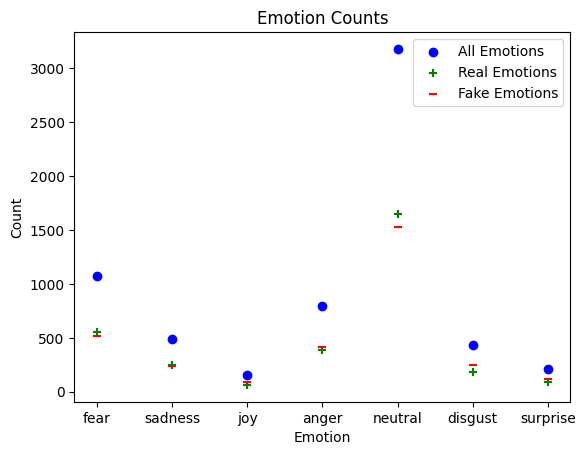

In [64]:
all_emotions = list(emotion_count.keys()) # Converting the keys to a list 
all_count = list(emotion_count.values()) # Converting the values to a list 

real_emotions = list(real_emotion_count.keys())
real_count = list(real_emotion_count.values())

fake_emotions = list(fake_emotion_count.keys())
fake_count = list(fake_emotion_count.values())

fig, ax = plt.subplots()

ax.scatter(all_emotions, all_count, c='blue', label='All Emotions', marker= "o")
#ax.plot(all_emotions, all_count, c='blue', label='All Emotions')

ax.scatter(real_emotions, real_count, c='green', label='Real Emotions', marker= "+" )
#ax.plot(real_emotions, real_count, c='green', label='Real Emotions')

ax.scatter(fake_emotions, fake_count, c='red', label='Fake Emotions', marker= "_")
#ax.plot(fake_emotions, fake_count, c='red', label='Fake Emotions')

ax.set_xlabel('Emotion')
ax.set_ylabel('Count')
plt.legend()
plt.title('Emotion Counts')
plt.show()